<a href="https://colab.research.google.com/github/LES4975/Computer_Engineering_Assignments/blob/main/Artificial_Intelligence_Homework4__7_layers_neural_network_epoch_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required libraries
!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

In [ ]:
#Import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

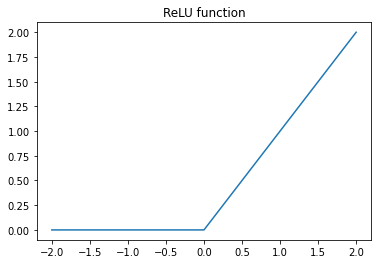

In [ ]:
relu = nn.ReLU()
x_np = np.arange(-2, 2.1, 0.25)
x = torch.tensor(x_np).float()
y = relu(x)

plt.plot(x.data, y.data)
plt.title('ReLU function')
plt.show()

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
data_root = './data'

train_set0 = datasets.MNIST(
    # Specify the directory where you want to download the source data
    root = data_root,
    # Training data or validation data
    train = True,
    download = True)

#print length of train_set0
print(len(train_set0))

# Import first element of dataset
image, label = train_set0[0]

# Check data type
print('insert data type : ', type(image))
print('answer data type : ', type(label))

60000
insert data type :  <class 'PIL.Image.Image'>
answer data type :  <class 'int'>


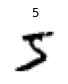

In [ ]:
# Output input data to image

plt.figure(figsize=(1,1))
plt.title(f'{label}')
plt.imshow(image, cmap='gray_r')
plt.axis('off')
plt.show()

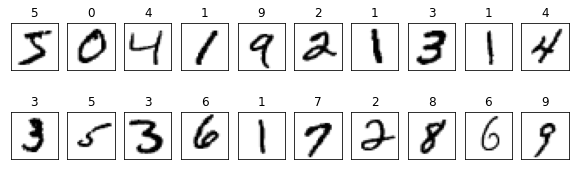

In [ ]:
# Outputs the first 20 data as images with correct data(label)

plt.figure(figsize=(10, 3))
for i in range(20):
    ax = plt.subplot(2, 10, i + 1)

    image, label = train_set0[i]

    plt.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Transforms is a function for data conversion

transform = transforms.Compose([
    # Convert data to tensor
    transforms.ToTensor(),

    # Data Normalization
    transforms.Normalize(0.5, 0.5),
])

In [ ]:
# Dataset function for data downloading

# Download training dataset
train_set = datasets.MNIST(
    root = data_root, train = True,
    download = True, transform = transform)

# Download testing(validation) dataset
test_set = datasets.MNIST(
    root = data_root, train = False,
    download = True, transform = transform)

In [ ]:
# use 80% for training and 20% for testing (validation).
#So, let's reform the dataset according to the conditions.

training_set = train_set

#Split 4000 examples of data from the training_set.
from torch.utils.data import random_split

training_set, splited_dataset = random_split(training_set, [56000, 4000])
#Check the length of training_set
print(len(training_set))
print(len(splited_dataset))

56000
4000


In [ ]:
#Concatenate datasets for testing
from torch.utils.data import ConcatDataset

testing_set = ConcatDataset([splited_dataset, test_set])
#Check the length of testing_set
print(len(testing_set))

14000


In [ ]:
# Import a library of dataloader
from torch.utils.data import DataLoader

# Mini batch size
batch_size = 280
# Training dataloader
train_loader = DataLoader(
    training_set, batch_size = batch_size,
    shuffle = True)

# Testing dataloader
# Shuffle not required for validation
test_loader = DataLoader(
    testing_set,  batch_size = batch_size,
    shuffle = True)

In [ ]:
# first_batch = train_loader.__iter__().next()

In [ ]:
# Print the number of group
print(len(train_loader))

for images, labels in train_loader:
    break


200


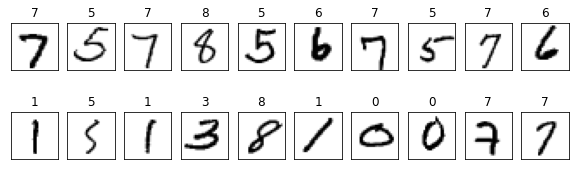

In [ ]:
# Print images
plt.figure(figsize=(10, 3))
for i in range(20):
    ax = plt.subplot(2, 10, i + 1)

    # Convert to array by using numpy()
    image = images[i].numpy()
    label = labels[i]

    # Return the range of the image to [0, 1]
    image2 = (image + 1)/ 2

    # Print images and labels
    plt.imshow(image2.reshape(28, 28),cmap='gray_r')
    ax.set_title(f'{label}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
print(len(training_set), len(testing_set))

56000 14000


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv1 = nn.Conv2d(1, 6, 5, 1)
        self.conv2 = nn.Conv2d(6, 10, 5, 1)
        self.conv3 = nn.Conv2d(10, 16, 5, 1)
        self.conv4 = nn.Conv2d(16, 20, 5, 1)
        self.conv5 = nn.Conv2d(20, 32, 5, 1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(2048, 256) #32*8*8 = 2048
        self.fc2 = nn.Linear(256, 10)
        # self.dropout = nn.Dropout(0.5)
        self.relu = nn.ReLU(inplace=True)
        # self.maxpool = nn.MaxPool2d((2,2))

    # n n1 n2 : This is mini batch size
    def forward(self, x):
        x = self.conv1(x) # 1 28 28 -> 6 24 24
        x = self.relu(x)
        x = self.conv2(x) #6 24 24 -> 10 20 20
        x = self.relu(x)
        x = self.conv3(x) # 10 20 20 -> 16 16 16
        x = self.relu(x)
        x = self.conv4(x) # 16 16 16 -> 20 12 12
        x = self.relu(x)
        x = self.conv5(x) # 20 12 12 -> 32 8 8
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

cnn = CNN()
print(cnn)

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(10, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv4): Conv2d(16, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv5): Conv2d(20, 32, kernel_size=(5, 5), stride=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)


In [ ]:
summary(cnn)

Layer (type:depth-idx)                   Param #
CNN                                      --
├─Conv2d: 1-1                            156
├─Conv2d: 1-2                            1,510
├─Conv2d: 1-3                            4,016
├─Conv2d: 1-4                            8,020
├─Conv2d: 1-5                            16,032
├─Flatten: 1-6                           --
├─Linear: 1-7                            524,544
├─Linear: 1-8                            2,570
├─ReLU: 1-9                              --
Total params: 556,848
Trainable params: 556,848
Non-trainable params: 0

In [ ]:
summary(cnn, input_size=(1, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [1, 10]                   --
├─Conv2d: 1-1                            [1, 6, 24, 24]            156
├─ReLU: 1-2                              [1, 6, 24, 24]            --
├─Conv2d: 1-3                            [1, 10, 20, 20]           1,510
├─ReLU: 1-4                              [1, 10, 20, 20]           --
├─Conv2d: 1-5                            [1, 16, 16, 16]           4,016
├─ReLU: 1-6                              [1, 16, 16, 16]           --
├─Conv2d: 1-7                            [1, 20, 12, 12]           8,020
├─ReLU: 1-8                              [1, 20, 12, 12]           --
├─Conv2d: 1-9                            [1, 32, 8, 8]             16,032
├─Flatten: 1-10                          [1, 2048]                 --
├─Linear: 1-11                           [1, 256]                  524,544
├─ReLU: 1-12                             [1, 256]                 

In [ ]:
# Send model to GPU
cnn = CNN().to(device)

In [ ]:
#Fix the random number
torch.manual_seed(123)
torch.cuda.manual_seed(123)
torch.backends.cudnn.deterministic = True
torch.use_deterministic_algorithms = True

#learning rate
lr = 0.001

criterion = nn.CrossEntropyLoss()

#Adam as the optimizer
optimizer = optim.Adam(cnn.parameters(), lr=lr)

# The number of epoch
num_epochs = 30

# Save result of training to history array
history = np.zeros((0,5))

In [ ]:
from tqdm.notebook import tqdm

# Start training and testing
for epoch in range(num_epochs):
    train_acc, train_loss = 0, 0
    val_acc, val_loss = 0, 0
    n_train, n_test = 0, 0

    # Training phase
    for inputs, labels in tqdm(train_loader):
        n_train += len(labels)

        # Send to GPU
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Initialize gradients
        optimizer.zero_grad()

        # Calculate the prediction
        outputs = cnn(inputs)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Calculate the gradient
        loss.backward()

        # Modify parameters
        optimizer.step()

        # Calculate a prediction label
        predicted = torch.max(outputs, 1)[1]

        # Calculate loss and accuracy
        train_loss += loss.item()
        train_acc += (predicted == labels).sum().item()

        # Testing phase
    for inputs_test, labels_test in test_loader:
        n_test += len(labels_test)

        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)


        # Calculate the prediction
        outputs_test = cnn(inputs_test)

        # Calculate the loss
        loss_test = criterion(outputs_test, labels_test)

        # Calculate a prediction label
        predicted_test = torch.max(outputs_test, 1)[1]

        # Calculate loss and accurancy
        val_loss +=  loss_test.item()
        val_acc +=  (predicted_test == labels_test).sum().item()

    # Print results and record them
    train_acc = train_acc / n_train
    val_acc = val_acc / n_test
    train_loss = train_loss * batch_size / n_train
    val_loss = val_loss * batch_size / n_test
    print (f'Epoch [{epoch+1}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
    item = np.array([epoch+1 , train_loss, train_acc, val_loss, val_acc])
    history = np.vstack((history, item))


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/30], loss: 0.39239 acc: 0.87623 val_loss: 0.10875, val_acc: 0.96507


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [2/30], loss: 0.09726 acc: 0.96918 val_loss: 0.06395, val_acc: 0.98086


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [3/30], loss: 0.05856 acc: 0.98091 val_loss: 0.05006, val_acc: 0.98436


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [4/30], loss: 0.05034 acc: 0.98373 val_loss: 0.04565, val_acc: 0.98614


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [5/30], loss: 0.04141 acc: 0.98698 val_loss: 0.04396, val_acc: 0.98600


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [6/30], loss: 0.03455 acc: 0.98913 val_loss: 0.04375, val_acc: 0.98636


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [7/30], loss: 0.03164 acc: 0.98991 val_loss: 0.04047, val_acc: 0.98671


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [8/30], loss: 0.02646 acc: 0.99138 val_loss: 0.04220, val_acc: 0.98686


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [9/30], loss: 0.02477 acc: 0.99220 val_loss: 0.04285, val_acc: 0.98679


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [10/30], loss: 0.02257 acc: 0.99254 val_loss: 0.03665, val_acc: 0.98893


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [11/30], loss: 0.02017 acc: 0.99334 val_loss: 0.03752, val_acc: 0.98907


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [12/30], loss: 0.01894 acc: 0.99405 val_loss: 0.04045, val_acc: 0.98843


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [13/30], loss: 0.01787 acc: 0.99371 val_loss: 0.03730, val_acc: 0.98936


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [14/30], loss: 0.01538 acc: 0.99491 val_loss: 0.04168, val_acc: 0.98829


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [15/30], loss: 0.01609 acc: 0.99505 val_loss: 0.04856, val_acc: 0.98600


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [16/30], loss: 0.01651 acc: 0.99441 val_loss: 0.04002, val_acc: 0.98864


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [17/30], loss: 0.01292 acc: 0.99587 val_loss: 0.04282, val_acc: 0.99000


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [18/30], loss: 0.01448 acc: 0.99509 val_loss: 0.03952, val_acc: 0.99029


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [19/30], loss: 0.01170 acc: 0.99613 val_loss: 0.04768, val_acc: 0.98764


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [20/30], loss: 0.01220 acc: 0.99613 val_loss: 0.04936, val_acc: 0.99071


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [21/30], loss: 0.01397 acc: 0.99511 val_loss: 0.04621, val_acc: 0.98929


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [22/30], loss: 0.01210 acc: 0.99577 val_loss: 0.04068, val_acc: 0.98943


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [23/30], loss: 0.01019 acc: 0.99670 val_loss: 0.04125, val_acc: 0.98986


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [24/30], loss: 0.01003 acc: 0.99652 val_loss: 0.06542, val_acc: 0.98600


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [25/30], loss: 0.01293 acc: 0.99607 val_loss: 0.05906, val_acc: 0.98550


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [26/30], loss: 0.00829 acc: 0.99738 val_loss: 0.04861, val_acc: 0.98936


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [27/30], loss: 0.00932 acc: 0.99679 val_loss: 0.04100, val_acc: 0.98986


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [28/30], loss: 0.00918 acc: 0.99686 val_loss: 0.04425, val_acc: 0.99050


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [29/30], loss: 0.00934 acc: 0.99691 val_loss: 0.06276, val_acc: 0.98700


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [30/30], loss: 0.00733 acc: 0.99746 val_loss: 0.05925, val_acc: 0.98979


In [ ]:
# Check loss and accurancy

print(f'Initial state - Loss : {history[0,3]:.5f}  Accuracy : {history[0,4]:.5f}' )
print(f'Final state - Loss : {history[-1,3]:.5f}  Accuracy : {history[-1,4]:.5f}' )

Initial state - Loss : 0.10875  Accuracy : 0.96507
Final state - Loss : 0.05925  Accuracy : 0.98979


In [ ]:
print(f'Test accuracy: {val_acc*100:.5f}%')

Test accuracy: 98.97857%


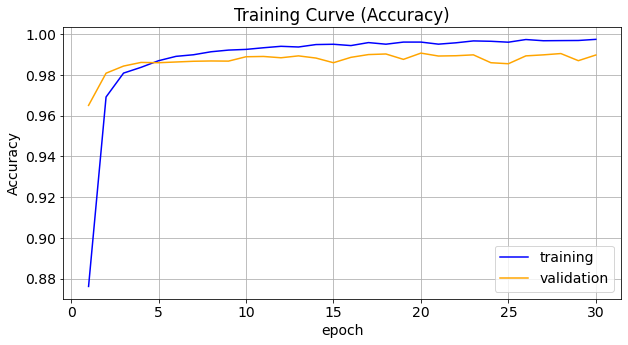

In [ ]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.unicode_minus'] = False
np.set_printoptions(suppress=True, precision=4)

#Visualize this result to Accurancy of the training and testing progress.
plt.plot(history[:,0], history[:,2], c='blue', label='training')
plt.plot(history[:,0], history[:,4], c='orange', label='validation')
# plt.ylim(0.82, 1.00)
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Training Curve (Accuracy)')
plt.legend(loc= 'lower right')
plt.show()

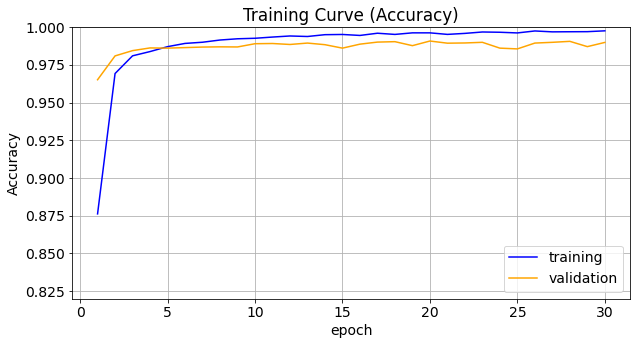

In [ ]:
#Visualize this result to Accurancy of the training and testing progress.
plt.plot(history[:,0], history[:,2], c='blue', label='training')
plt.plot(history[:,0], history[:,4], c='orange', label='validation')
plt.ylim(0.82, 1.00)
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Training Curve (Accuracy)')
plt.legend(loc= 'lower right')
plt.show()

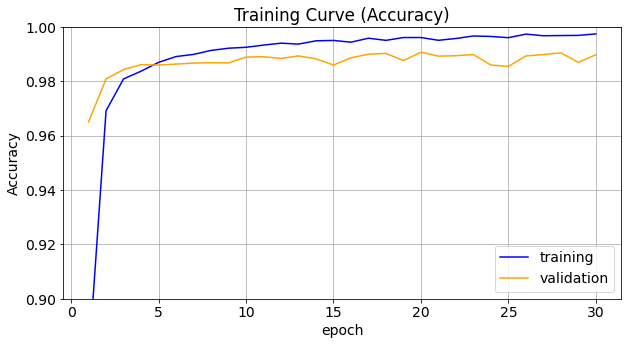

In [ ]:
#Visualize this result to Accurancy of the training and testing progress.
plt.plot(history[:,0], history[:,2], c='blue', label='training')
plt.plot(history[:,0], history[:,4], c='orange', label='validation')
plt.ylim(0.90, 1.00)
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Training Curve (Accuracy)')
plt.legend(loc= 'lower right')
plt.show()

In [ ]:
# from torchsummary import summary
# summary(cnn, input_size=(1, 28, 28))

In [ ]:
# pred = cnn.predict

In [ ]:
# import random

# samples = random.choices(population=wrong_result, k =16)

# plt.figure(figsize=(14, 12))

# for idx, n in enumerate(samples):
#     plt.subplot(4, 4, idx + 1)
#     plt.imshow(X_test[n].reshape(28,28), cmap = 'Greys', interpolation='nearest')
#     plt.title('Label ' + str(y_test[n]) + ', Predict ' + str(predicted_labels[n]))
#     plt.axis('off')

# plt.show()

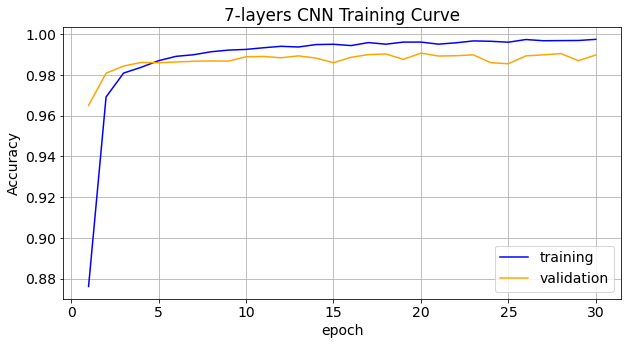

In [ ]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.unicode_minus'] = False
np.set_printoptions(suppress=True, precision=4)

#Visualize this result to Accurancy of the training and testing progress.
plt.plot(history[:,0], history[:,2], c='blue', label='training')
plt.plot(history[:,0], history[:,4], c='orange', label='validation')
# plt.ylim(0.82, 1.00)
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('7-layers CNN Training Curve')
plt.legend(loc= 'lower right')
plt.show()